# Home Grown Tensorflow

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
import splitfolders
import scipy
import os
import numpy as np
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model

In [52]:
#model = tf.keras.models.load_model('X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/Models/hgrown_tensor_2')

In [ ]:
#split the images into train test and validation with the ratio of 80% 10% 10%

main_folder = "X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/kagglecatsanddogs_5340/PetImages"
output_folder = "X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder"
splitfolders.ratio(main_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))

The structure of data file before split folder


kaggleCatsAndDogs
    PetImages
        Cat
            1.jpg
            2.jpg
            ...
        Dog
            1.jpg
            2.jpg
            ...

The structure of data file after split folder
SplitFolder
    Folder
        test
            Cat
                1.jpg
                2.jpg
                ...
            Dog
                1.jpg
                2.jpg
                ...
        train
            Cat
                1.jpg
                2.jpg
                ...
            Dog
                1.jpg
                2.jpg
                ...
        val
            Cat
                1.jpg
                2.jpg
                ...
            Dog
                1.jpg
                2.jpg
                ...


In [ ]:
import os
from PIL import Image
import time

In [ ]:
filelist = []

#train data
#cat
path ="X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat"
for root, dirs, files in os.walk(path):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))

#dog	
path ="X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog"
for root, dirs, files in os.walk(path):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))

#------------------------------------------------------------------------------------------
		
#test data
#cat
path ="X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Cat"
for root, dirs, files in os.walk(path):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))

#dog	
path ="X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Dog"
for root, dirs, files in os.walk(path):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))

#------------------------------------------------------------------------------------------
		
#validation data
#cat
path ="X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/val/Cat"
for root, dirs, files in os.walk(path):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))

#dog
path ="X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/val/Dog"
for root, dirs, files in os.walk(path):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))

In [ ]:
corrupted_file = []

for x in filelist:
    try:
        test = Image.open(x)
        test.rotate(10)
        test.close
    except:
        corrupted_file.append(x)
        pass
print(corrupted_file)

x:\E_drive\#_VSCode\Deep_learning_assignment_3\venv\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


['X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\\666.jpg', 'X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\\11702.jpg']


In [ ]:
#bs=30         #Setting batch size
train_dir = "X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/"   #Setting training directory
validation_dir = "X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/val/"   #Setting testing directory

# All images will be rescaled by 1./255. 
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,class_mode='categorical',target_size=(180,180))


validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         #batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))

Found 19996 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(180,180,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Change 1 to 2 and 'sigmoid' to 'softmax'
])

adam=Adam(learning_rate=0.0001)
model_2.compile(optimizer=adam, loss='categorical_crossentropy', metrics = ['acc'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, factor=0.1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=4)

history_2 = model_2.fit(train_generator, validation_data=validation_generator, epochs=15, callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/15
625/625 [==============================] - 285s 455ms/step - loss: 0.5787 - acc: 0.6844 - val_loss: 0.4798 - val_acc: 0.7820 - lr: 1.0000e-04
Epoch 2/15
625/625 [==============================] - 285s 456ms/step - loss: 0.4465 - acc: 0.7900 - val_loss: 0.4062 - val_acc: 0.8208 - lr: 1.0000e-04
Epoch 3/15
625/625 [==============================] - 285s 456ms/step - loss: 0.3893 - acc: 0.8243 - val_loss: 0.3704 - val_acc: 0.8344 - lr: 1.0000e-04
Epoch 4/15
625/625 [==============================] - 285s 455ms/step - loss: 0.3408 - acc: 0.8502 - val_loss: 0.3401 - val_acc: 0.8488 - lr: 1.0000e-04
Epoch 5/15
625/625 [==============================] - 285s 455ms/step - loss: 0.2922 - acc: 0.8749 - val_loss: 0.3350 - val_acc: 0.8600 - lr: 1.0000e-04
Epoch 6/15
625/625 [==============================] - 286s 457ms/step - loss: 0.2520 - acc: 0.8954 - val_loss: 0.3455 - val_acc: 0.8508 - lr: 1.0000e-04
Epoch 7/15
625/625 [==============================] - 285s 455ms/step - loss: 0.21

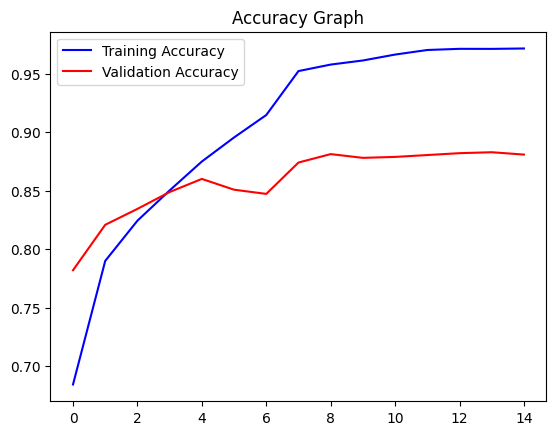

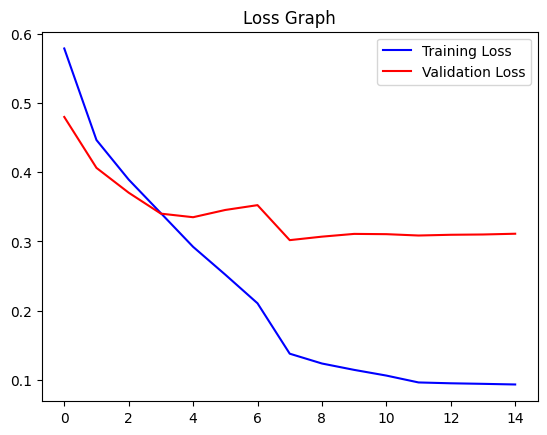

In [ ]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
model_2.save('X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/Models/hgrown_tensor_2')

INFO:tensorflow:Assets written to: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/Models/hgrown_tensor_2\assets


INFO:tensorflow:Assets written to: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/Models/hgrown_tensor_2\assets


In [ ]:
model = tf.keras.models.load_model('X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/Models/hgrown_tensor_2')

In [ ]:
adam=Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
test_dir = "X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/"
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_generator=test_datagen.flow_from_directory(test_dir,class_mode='categorical',target_size=(180,180))

Found 2502 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

79/79 [==============================] - 9s 105ms/step - loss: 0.3276 - acc: 0.8781


---

# Homegrown PyTorch

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms

from tqdm import tqdm
from torchinfo import summary
from torch.utils.data import DataLoader

In [ ]:
def load_images(path):

    images = []
    filenames = os.listdir(path)
    
    for filename in tqdm(filenames): 
        if filename == '_DS_Store':
            continue
        image = cv2.imread(os.path.join(path, filename))
        image = cv2.resize(image, dsize=(100,100), interpolation=cv2.INTER_AREA)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    
    return np.array(images)

In [ ]:
def load_images(path):
    images = []
    filenames = os.listdir(path)
    
    for filename in tqdm(filenames): 
        if filename == '_DS_Store':
            continue
        
        # Construct the full file path
        file_path = os.path.join(path, filename)
        
        # Check if the file exists
        if not os.path.isfile(file_path):
            print(f"File not found: {file_path}")
            continue

        # Read the image
        image = cv2.imread(file_path)

        # Check if the image is successfully loaded
        if image is None:
            print(f"Error loading image: {file_path}")
            continue

        # Resize and preprocess the image
        image = cv2.resize(image, dsize=(100, 100), interpolation=cv2.INTER_AREA)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    
    return np.array(images)

In [ ]:
cats_train = load_images('X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat')
dogs_train = load_images('X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog')

cats_test = load_images('X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Cat')
dogs_test = load_images('X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Dog')

  2%|▏         | 173/9998 [00:00<00:27, 354.60it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\10125.jpg


  4%|▍         | 426/9998 [00:01<00:28, 334.90it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\10404.jpg


  5%|▌         | 528/9998 [00:01<00:28, 331.87it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\10501.jpg


  8%|▊         | 817/9998 [00:02<00:26, 348.95it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\10820.jpg


 11%|█▏        | 1137/9998 [00:03<00:25, 352.24it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\11210.jpg


 15%|█▍        | 1451/9998 [00:04<00:24, 343.67it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\11565.jpg


 24%|██▍       | 2429/9998 [00:07<00:22, 334.30it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\140.jpg


 41%|████      | 4120/9998 [00:12<00:17, 337.28it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\3300.jpg


 43%|████▎     | 4303/9998 [00:12<00:15, 361.32it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\3491.jpg


 55%|█████▌    | 5502/9998 [00:16<00:12, 366.10it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\4833.jpg


 61%|██████    | 6105/9998 [00:18<00:11, 346.13it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\5553.jpg


 71%|███████   | 7059/9998 [00:20<00:08, 353.78it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\660.jpg


 83%|████████▎ | 8272/9998 [00:24<00:05, 335.26it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\7968.jpg
Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\7978.jpg


 87%|████████▋ | 8699/9998 [00:25<00:03, 339.96it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\8470.jpg
Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\850.jpg


 93%|█████████▎| 9292/9998 [00:27<00:02, 330.71it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\9171.jpg


 95%|█████████▍| 9473/9998 [00:27<00:01, 356.53it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\936.jpg


 97%|█████████▋| 9655/9998 [00:28<00:00, 357.26it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\9565.jpg


 98%|█████████▊| 9837/9998 [00:28<00:00, 346.15it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Cat\9778.jpg


  2%|▏         | 195/9998 [00:00<00:30, 325.18it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\10158.jpg


  4%|▍         | 440/9998 [00:01<00:28, 340.72it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\10401.jpg


  8%|▊         | 756/9998 [00:02<00:26, 345.18it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\10747.jpg


 13%|█▎        | 1316/9998 [00:03<00:26, 331.93it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\11410.jpg


 17%|█▋        | 1700/9998 [00:05<00:24, 339.43it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\11849.jpg
Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\11853.jpg


 23%|██▎       | 2326/9998 [00:06<00:22, 335.70it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\1308.jpg


 28%|██▊       | 2845/9998 [00:08<00:21, 340.50it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\1866.jpg


 38%|███▊      | 3768/9998 [00:11<00:17, 350.97it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\2877.jpg


 41%|████      | 4116/9998 [00:12<00:17, 330.66it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\3288.jpg


 44%|████▎     | 4355/9998 [00:13<00:16, 336.70it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\3588.jpg


 51%|█████     | 5055/9998 [00:15<00:14, 333.31it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\4367.jpg


 63%|██████▎   | 6259/9998 [00:18<00:10, 340.05it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\5736.jpg


 65%|██████▌   | 6544/9998 [00:19<00:10, 335.42it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\6059.jpg


 67%|██████▋   | 6720/9998 [00:19<00:09, 335.38it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\6238.jpg


 71%|███████▏  | 7139/9998 [00:21<00:08, 342.85it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\6718.jpg


 75%|███████▍  | 7488/9998 [00:22<00:07, 341.14it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\7112.jpg
Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\7133.jpg


 77%|███████▋  | 7733/9998 [00:23<00:06, 339.21it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\7369.jpg


 78%|███████▊  | 7804/9998 [00:23<00:06, 346.80it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\7459.jpg


 89%|████████▉ | 8926/9998 [00:26<00:03, 330.68it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\8730.jpg


 93%|█████████▎| 9337/9998 [00:27<00:01, 335.28it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/Dog\9188.jpg


 24%|██▍       | 303/1251 [00:00<00:02, 439.79it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Cat\11874.jpg


  9%|▉         | 113/1251 [00:00<00:03, 349.33it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Dog\10797.jpg


 36%|███▌      | 453/1251 [00:01<00:01, 416.80it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Dog\2384.jpg
Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Dog\2688.jpg


 67%|██████▋   | 832/1251 [00:02<00:01, 413.03it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Dog\5604.jpg


 87%|████████▋ | 1094/1251 [00:02<00:00, 414.40it/s]

Error loading image: X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/Dog\7969.jpg


100%|██████████| 1251/1251 [00:03<00:00, 406.76it/s]


In [ ]:
print(cats_train.shape)
print(dogs_train.shape)
print(cats_test.shape)
print(dogs_test.shape)

(9978, 100, 100, 3)
(9976, 100, 100, 3)
(1250, 100, 100, 3)
(1246, 100, 100, 3)


: 

In [ ]:
X_train = np.append(cats_train, dogs_train, axis=0)
X_test  = np.append(cats_test, dogs_test, axis=0)

print(X_train.shape)
print(X_test.shape)

(19954, 100, 100, 3)
(2496, 100, 100, 3)


In [ ]:
y_train = np.array([0] * len(cats_train) + [1] * len(dogs_train))
y_test = np.array([0] * len(cats_test) + [1] * len(dogs_test))

print(y_train.shape)
print(y_test.shape)

(19954,)
(2496,)


In [ ]:
y_train = torch.from_numpy(y_train.reshape(len(y_train),1))
y_test = torch.from_numpy(y_test.reshape(len(y_test),1))

print(y_train[:10])

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=torch.int32)


In [ ]:
transforms_train = transforms.Compose([transforms.ToTensor(), # convert to tensor
                                       #transforms.RandomRotation(degrees=20), 
                                       #transforms.RandomHorizontalFlip(p=0.5), 
                                       #transforms.RandomVerticalFlip(p=0.005), 
                                       #transforms.RandomGrayscale(p=0.2), 
                                       transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]) # squeeze to -1 and 1
                                      ])

In [ ]:
transforms_test = transforms.Compose([transforms.ToTensor(), 
                                     transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])

In [ ]:
class Cat_Dog_Dataset():
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]
        
        if self.transform:
            image = self.transform(image)
        
        return (image, label)

In [ ]:
train_dataset = Cat_Dog_Dataset(images=X_train, labels=y_train, transform=transforms_train)
test_dataset  = Cat_Dog_Dataset(images=X_test, labels=y_test, transform=transforms_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)

In [ ]:
iterator = iter(train_loader)
image_batch, label_batch = next(iterator)

print(image_batch.shape)

torch.Size([32, 3, 100, 100])


In [ ]:
image_batch_permuted = image_batch.permute(0, 2, 3, 1)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv0 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1), bias=False)
        self.bn0 = nn.BatchNorm2d(num_features=16)
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        
        self.conv1 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), stride=(1,1), padding=(1,1), bias=False)
        self.bn1 = nn.BatchNorm2d(num_features=32)
        # self.maxpool
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), stride=(1,1), padding=(1,1), bias=False)
        self.bn2 = nn.BatchNorm2d(num_features=64)
        # self.maxpool
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=(1,1), padding=(1,1), bias=False)
        self.bn3 = nn.BatchNorm2d(num_features=128)
        # self.maxpool
        
        self.dropout = nn.Dropout(p=0.5)
        self.fc0 = nn.Linear(in_features=128*6*6, out_features=64)
        self.fc1 = nn.Linear(in_features=64, out_features=32)
        self.fc2 = nn.Linear(in_features=32, out_features=1)
        
    def forward(self, x):
        x = F.relu(self.bn0(self.conv0(x)))
        x = self.maxpool(x)
        
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)
        
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool(x)

        x = x.reshape(x.shape[0], -1)
        
        x = self.dropout(x)
        x = F.relu(self.fc0(x))
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        
        return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
model = CNN().to(device)

In [ ]:
summary(model, input_size=(4,3,100,100))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [4, 1]                    --
├─Conv2d: 1-1                            [4, 16, 100, 100]         432
├─BatchNorm2d: 1-2                       [4, 16, 100, 100]         32
├─MaxPool2d: 1-3                         [4, 16, 50, 50]           --
├─Conv2d: 1-4                            [4, 32, 50, 50]           4,608
├─BatchNorm2d: 1-5                       [4, 32, 50, 50]           64
├─MaxPool2d: 1-6                         [4, 32, 25, 25]           --
├─Conv2d: 1-7                            [4, 64, 25, 25]           18,432
├─BatchNorm2d: 1-8                       [4, 64, 25, 25]           128
├─MaxPool2d: 1-9                         [4, 64, 12, 12]           --
├─Conv2d: 1-10                           [4, 128, 12, 12]          73,728
├─BatchNorm2d: 1-11                      [4, 128, 12, 12]          256
├─MaxPool2d: 1-12                        [4, 128, 6, 6]            --
├

In [ ]:
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def predict_test_data(model, test_loader):
    
    num_correct = 0
    num_samples = 0
    
    model.eval()
    
    with torch.no_grad():
        for batch, (X_test, y_test) in enumerate(test_loader):
            X_test = X_test.float().to(device)
            y_test = y_test.float().to(device)

            # Calculate loss (forward propagation)
            test_preds = model(X_test)
            test_loss  = loss_function(test_preds, y_test)
            
            # Calculate accuracy
            rounded_test_preds = torch.round(test_preds)
            num_correct += torch.sum(rounded_test_preds == y_test)
            num_samples += len(y_test)
        
    model.train()
    
    test_acc = num_correct/num_samples
    
    return test_loss, test_acc

In [ ]:
train_losses = []    # Training and testing loss was calculated based on the last batch of each epoch.
test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(0,15):
    
    num_correct_train = 0
    num_samples_train = 0
    for batch, (X_train, y_train) in tqdm(enumerate(train_loader), total=len(train_loader)):
        X_train = X_train.float().to(device)
        y_train = y_train.float().to(device)
        
        # Forward propagation
        train_preds = model(X_train)
        train_loss = loss_function(train_preds, y_train)
        
        # Calculate train accuracy
        with torch.no_grad():
            rounded_train_preds = torch.round(train_preds)
            num_correct_train += torch.sum(rounded_train_preds == y_train)
            num_samples_train += len(y_train)
            
        # Backward propagation
        optimizer.zero_grad()
        train_loss.backward()
        
        # Gradient descent
        optimizer.step()
    
    train_acc = num_correct_train/num_samples_train
    test_loss, test_acc = predict_test_data(model, test_loader)
    
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())
        
    print(f'Epoch: {epoch} \t|' \
            f' Train loss: {np.round(train_loss.item(),3)} \t|' \
            f' Test loss: {np.round(test_loss.item(),3)} \t|' \
            f' Train acc: {np.round(train_acc.item(),2)} \t|' \
            f' Test acc: {np.round(test_acc.item(),2)}')

100%|██████████| 623/623 [01:25<00:00,  7.29it/s]


Epoch: 0 	| Train loss: 0.301 	| Test loss: 0.381 	| Train acc: 0.84 	| Test acc: 0.83


100%|██████████| 623/623 [01:24<00:00,  7.38it/s]


Epoch: 1 	| Train loss: 0.413 	| Test loss: 0.57 	| Train acc: 0.87 	| Test acc: 0.81


100%|██████████| 623/623 [01:22<00:00,  7.54it/s]


Epoch: 2 	| Train loss: 0.191 	| Test loss: 0.355 	| Train acc: 0.89 	| Test acc: 0.87


100%|██████████| 623/623 [01:21<00:00,  7.63it/s]


Epoch: 3 	| Train loss: 0.242 	| Test loss: 0.449 	| Train acc: 0.9 	| Test acc: 0.89


100%|██████████| 623/623 [01:21<00:00,  7.62it/s]


Epoch: 4 	| Train loss: 0.112 	| Test loss: 0.367 	| Train acc: 0.91 	| Test acc: 0.84


100%|██████████| 623/623 [01:24<00:00,  7.40it/s]


Epoch: 5 	| Train loss: 0.2 	| Test loss: 0.18 	| Train acc: 0.92 	| Test acc: 0.9


100%|██████████| 623/623 [01:17<00:00,  7.99it/s]


Epoch: 6 	| Train loss: 0.047 	| Test loss: 0.156 	| Train acc: 0.93 	| Test acc: 0.9


100%|██████████| 623/623 [01:18<00:00,  7.98it/s]


Epoch: 7 	| Train loss: 0.131 	| Test loss: 0.278 	| Train acc: 0.94 	| Test acc: 0.85


100%|██████████| 623/623 [01:17<00:00,  7.99it/s]


Epoch: 8 	| Train loss: 0.203 	| Test loss: 0.206 	| Train acc: 0.94 	| Test acc: 0.9


100%|██████████| 623/623 [01:18<00:00,  7.99it/s]


Epoch: 9 	| Train loss: 0.035 	| Test loss: 0.091 	| Train acc: 0.95 	| Test acc: 0.89


100%|██████████| 623/623 [01:18<00:00,  7.98it/s]


Epoch: 10 	| Train loss: 0.211 	| Test loss: 0.103 	| Train acc: 0.95 	| Test acc: 0.9


100%|██████████| 623/623 [01:17<00:00,  8.04it/s]


Epoch: 11 	| Train loss: 0.045 	| Test loss: 0.213 	| Train acc: 0.96 	| Test acc: 0.92


100%|██████████| 623/623 [01:17<00:00,  8.02it/s]


Epoch: 12 	| Train loss: 0.097 	| Test loss: 0.535 	| Train acc: 0.96 	| Test acc: 0.91


100%|██████████| 623/623 [01:17<00:00,  8.05it/s]


Epoch: 13 	| Train loss: 0.126 	| Test loss: 0.167 	| Train acc: 0.96 	| Test acc: 0.89


100%|██████████| 623/623 [01:17<00:00,  8.04it/s]


Epoch: 14 	| Train loss: 0.017 	| Test loss: 0.238 	| Train acc: 0.97 	| Test acc: 0.91


model           training acc        testing acc
tensorflow      0.9714              0.8781
torch           0.97                0.91

In [ ]:
torch.save(model.state_dict(), 'X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/Models/hgrown_torch_1')

---

# Transfer Learning With Tensorflow

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
local_weights_file = 'X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/inception_v3_weights.h5'
pre_trained_model = InceptionV3(input_shape=(180, 180, 3), include_top=False, weights=None)

In [6]:
#load the weights into the inception model
pre_trained_model.load_weights(local_weights_file)

In [7]:
#set False as we are not training any of the inception layers
for layer in pre_trained_model.layers:
    layer.trainable = False

In [8]:
last_layer = pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 4, 4, 2048)


"In general, the "mixed9" block is responsible for extracting and transforming features from the input data."

In [9]:
#adding output layer to the model
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x) #A dropout layer is a regularization technique used in convolutional neural networks (CNNs) and other deep learning models.

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Build the new model
model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
train_dir = "X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/train/"   #Setting training directory
validation_dir = "X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/val/"   #Setting testing directory

In [12]:
train_datagen = ImageDataGenerator(rescale=1. / 255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# normalise the pixel value using rescale
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    #batch_size=BATCH_SIZE,
                                                    target_size=(180,180),
                                                    class_mode='binary')

TOTAL_TRAINING = len(train_generator.filenames)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              #batch_size=BATCH_SIZE,
                                                              target_size=(180,180),
                                                              class_mode='binary')

TOTAL_VALIDATION = len(validation_generator.filenames)

Found 19996 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [14]:
# define callbacks
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.1, min_lr=0.0001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [15]:
#train the model 
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    #steps_per_epoch=TOTAL_TRAINING / BATCH_SIZE,
    #validation_steps=TOTAL_VALIDATION / BATCH_SIZE,
    callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/5
495/625 [======================>.......] - ETA: 1:12 - loss: 0.1194 - accuracy: 0.9542

x:\E_drive\#_VSCode\Deep_learning_assignment_3\venv\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - 377s 603ms/step - loss: 0.1168 - accuracy: 0.9550 - val_loss: 0.0563 - val_accuracy: 0.9784 - lr: 1.0000e-04
Epoch 2/5
625/625 [==============================] - 386s 617ms/step - loss: 0.0893 - accuracy: 0.9643 - val_loss: 0.0378 - val_accuracy: 0.9836 - lr: 1.0000e-04
Epoch 3/5
625/625 [==============================] - 397s 635ms/step - loss: 0.0829 - accuracy: 0.9678 - val_loss: 0.0392 - val_accuracy: 0.9852 - lr: 1.0000e-04
Epoch 4/5
625/625 [==============================] - 399s 639ms/step - loss: 0.0802 - accuracy: 0.9687 - val_loss: 0.0359 - val_accuracy: 0.9860 - lr: 1.0000e-04
Epoch 5/5
625/625 [==============================] - 401s 642ms/step - loss: 0.0722 - accuracy: 0.9739 - val_loss: 0.0331 - val_accuracy: 0.9888 - lr: 1.0000e-04


In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 89, 89, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 89, 89, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 89, 89, 32)           0         ['batch_normalization[0][0

Total params: 49,279,201 (187.99 MB)
Trainable params: 33,556,481 (128.01 MB)
Non-trainable params: 15,722,720 (59.98 MB)

In [20]:
test_dir = "X:/E_drive/# Pace/Sem 3/Deep learning/Assignments/3/split_folders/folder/test/"
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)
test_generator=test_datagen.flow_from_directory(test_dir,class_mode='binary',target_size=(180,180))

Found 2502 images belonging to 2 classes.


In [21]:
test_loss, test_accuracy = model.evaluate(test_generator)

79/79 [==============================] - 26s 324ms/step - loss: 0.0382 - accuracy: 0.9884


model           training acc        testing acc

tens            0.9714              0.8781
torch           0.97                0.91
inc ten         0.9739              0.9884

---

# Transfer Learning with PyTorch

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision import models
import torchvision.utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define data transformations (resize, crop, normalize)
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
!unzip /content/drive/MyDrive/Output.zip -d /content/drive/MyDrive/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Output/train/Dog/10429.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/2608.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/5167.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/4279.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/3516.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/11051.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/9985.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/8443.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/695.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/1301.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/9991.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/7764.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/8457.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/859.jpg  
  inflating: /content/drive/MyDrive/Output/train/Dog/

In [ ]:
train_data = dsets.ImageFolder('/content/drive/MyDrive/Output/train', train_transform)
test_data = dsets.ImageFolder('/content/drive/MyDrive/Output/val', test_transform)
val_data = dsets.ImageFolder('/content/drive/MyDrive/Output/test', test_transform)

In [ ]:
batch_size = 30

train_loader = DataLoader(train_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_data,
                         batch_size=batch_size,
                         shuffle=True)

# Assuming you have a validation dataset named 'val_data' and batch_size_val
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

In [ ]:
def imshow(img, title):
    img = torchvision.utils.make_grid(img, normalize=True)
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

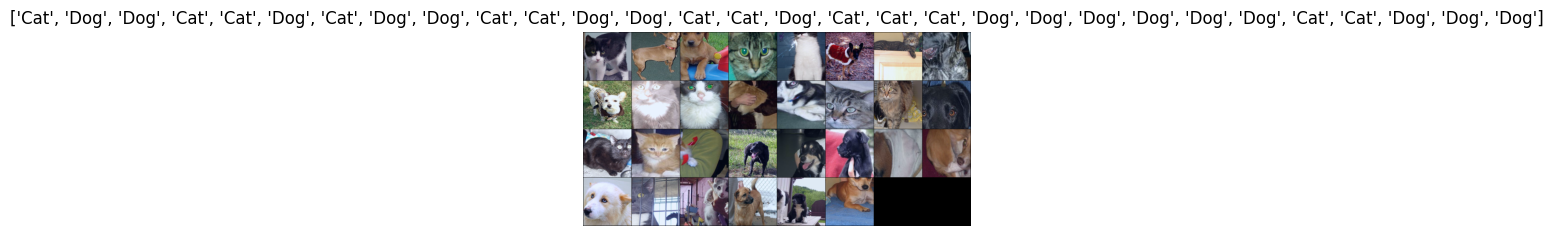

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.__next__()

imshow(images, [train_data.classes[i] for i in labels])

In [ ]:
model = models.inception_v3(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 186MB/s] 


In [ ]:
model.aux_logits = False

for parameter in model.parameters():
    parameter.requires_grad = False

In [ ]:
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 10),
    nn.Linear(10, 2)
)

In [ ]:
model = model.cuda()

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

Model Training

In [ ]:
num_epochs = 5

In [ ]:
import time
import torch.nn.functional as F
import time

In [ ]:
import time

# Define variables to track metrics
best_val_acc = 0.0
start_time = time.time()

for epoch in range(num_epochs):
    # Training
    model.train()
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (batch_images, batch_labels) in enumerate(train_loader):
        X = batch_images.cuda()
        Y = batch_labels.cuda()

        X = F.interpolate(X, size=(299, 299), mode='bilinear', align_corners=False)

        optimizer.zero_grad()
        pre = model(X)
        cost = loss(pre, Y)
        cost.backward()
        optimizer.step()

        _, predicted = torch.max(pre.data, 1)
        total_train_loss += cost.item()
        total_train += Y.size(0)
        correct_train += (predicted == Y).sum().item()

        if (i + 1) % 5 == 0:
            print('Epoch [%d/%d], Iter [%d/%d] Training Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_loader), cost.item()))

    train_loss = total_train_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            X = images.cuda()
            Y = labels.cuda()

            X = F.interpolate(X, size=(299, 299), mode='bilinear', align_corners=False)

            pre = model(X)
            cost = loss(pre, Y)

            _, predicted = torch.max(pre.data, 1)
            total_val_loss += cost.item()
            total_val += Y.size(0)
            correct_val += (predicted == Y).sum().item()

    val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    # Calculate the time taken for this epoch
    epoch_time = time.time() - start_time
    start_time = time.time()

    # Print training and validation metrics for each epoch
    print('Epoch [%d/%d], Training Loss: %.4f, Training Accuracy: %.2f%%, '
          'Validation Loss: %.4f, Validation Accuracy: %.2f%%, Time: %.2fs'
          % (epoch + 1, num_epochs, train_loss, train_accuracy, val_loss, val_accuracy, epoch_time))

    # Save the model if validation accuracy improves
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        # Save your model using torch.save if needed

print('Training complete!')

Epoch [1/5], Iter [5/659] Training Loss: 0.0498
Epoch [1/5], Iter [10/659] Training Loss: 0.4154
Epoch [1/5], Iter [15/659] Training Loss: 0.0720
Epoch [1/5], Iter [20/659] Training Loss: 0.1397
Epoch [1/5], Iter [25/659] Training Loss: 0.3055
Epoch [1/5], Iter [30/659] Training Loss: 0.1887
Epoch [1/5], Iter [35/659] Training Loss: 0.0687
Epoch [1/5], Iter [40/659] Training Loss: 0.2509
Epoch [1/5], Iter [45/659] Training Loss: 0.1640
Epoch [1/5], Iter [50/659] Training Loss: 0.1236
Epoch [1/5], Iter [55/659] Training Loss: 0.2124
Epoch [1/5], Iter [60/659] Training Loss: 0.1788
Epoch [1/5], Iter [65/659] Training Loss: 0.0356
Epoch [1/5], Iter [70/659] Training Loss: 0.1525
Epoch [1/5], Iter [75/659] Training Loss: 0.1337
Epoch [1/5], Iter [80/659] Training Loss: 0.1159
Epoch [1/5], Iter [85/659] Training Loss: 0.0614
Epoch [1/5], Iter [90/659] Training Loss: 0.1378
Epoch [1/5], Iter [95/659] Training Loss: 0.0926
Epoch [1/5], Iter [100/659] Training Loss: 0.1660
Epoch [1/5], Iter [1

Epoch [1/5], Training Loss: 0.1560, Training Accuracy: 93.56%, Validation Loss: 0.0660, Validation Accuracy: 98.60%, Time: 136.03s


Epoch [2/5], Training Loss: 0.1612, Training Accuracy: 93.37%, Validation Loss: 0.0515, Validation Accuracy: 98.52%, Time: 136.64s


Epoch [3/5], Training Loss: 0.1543, Training Accuracy: 93.85%, Validation Loss: 0.0473, Validation Accuracy: 98.64%, Time: 137.17s


Epoch [4/5], Training Loss: 0.1555, Training Accuracy: 93.67%, Validation Loss: 0.0469, Validation Accuracy: 98.80%, Time: 136.31s


Epoch [5/5], Training Loss: 0.1585, Training Accuracy: 93.46%, Validation Loss: 0.0549, Validation Accuracy: 98.84%, Time: 136.69s

In [ ]:
# Define the device (use GPU if available, otherwise use CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)  # Move the model to the specified device

model.eval()

correct = 0
total = 0

with torch.no_grad():  # Use no_grad to avoid computing gradients during evaluation
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)  # Transfer data to the GPU or CPU based on device

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Use .item() to get a scalar value

accuracy = 100 * correct / total
print('Accuracy of test images: %.2f%%' % accuracy)


Accuracy of test images: 98.84%


model           training acc        testing acc

tens            0.9714              0.8781
torch           0.97                0.91
inc ten         0.9739              0.9884
inc torch       0.9346              0.9884

---

# Comparing training accuracy and testing accuracy

In [23]:
training_acc = [0.9714, 0.97, 0.9739, 0.9346]
testing_acc = [0.8781, 0.91, 0.9884, 0.9884]

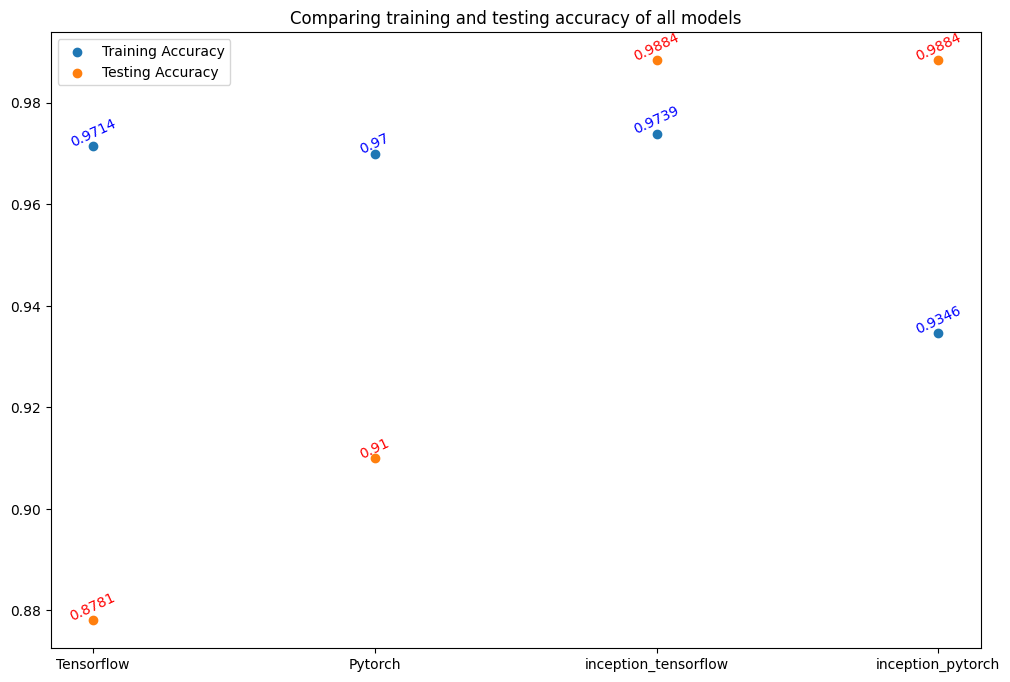

In [44]:
x_ax = ['Tensorflow', 'Pytorch', 'inception_tensorflow', 'inception_pytorch']

plt.figure(figsize=(12,8))
plt.title('Comparing training and testing accuracy of all models')
plt.scatter(x_ax ,training_acc, label='Training Accuracy')
plt.scatter(x_ax,testing_acc, label='Testing Accuracy')

for ind, mae_val in zip(range(len(training_acc)), training_acc):
  plt.text(ind, mae_val, mae_val, rotation=25, ha='center', c='blue')

for ind, mae_val in zip(range(len(testing_acc)), testing_acc):
  plt.text(ind, mae_val, mae_val, rotation=25, ha='center', c='red')

plt.legend()

In [45]:
training_loss = [0.0934, 0.017, 0.0722, 0.1585]
testing_loss = [0.3276, 0.238, 0.0382, 0.0549]

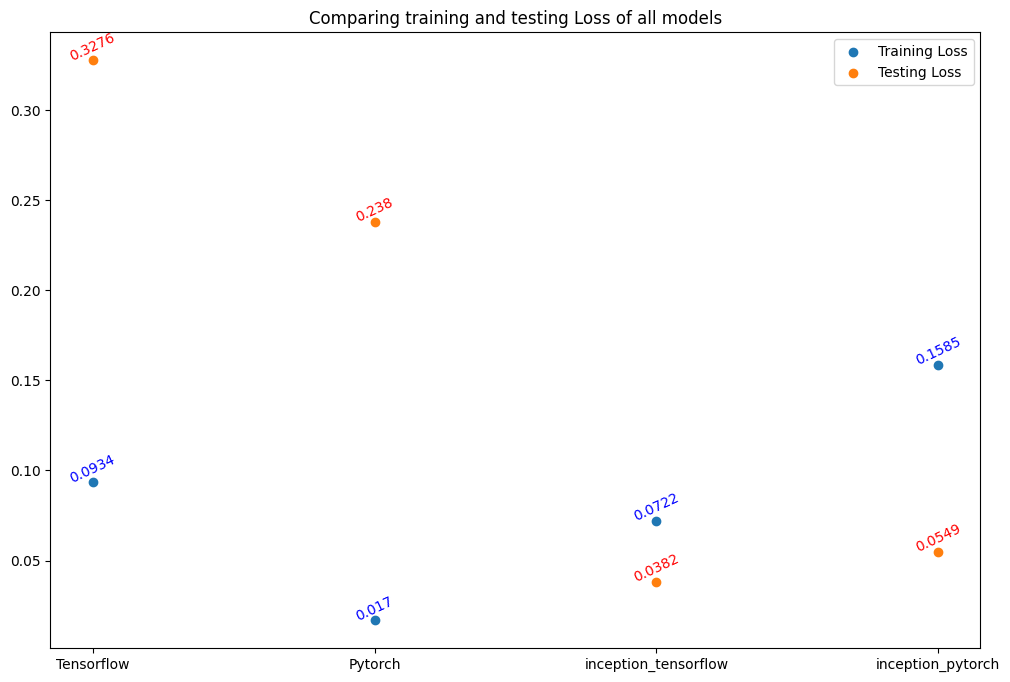

In [46]:
x_ax = ['Tensorflow', 'Pytorch', 'inception_tensorflow', 'inception_pytorch']

plt.figure(figsize=(12,8))
plt.title('Comparing training and testing Loss of all models')
plt.scatter(x_ax, training_loss, label='Training Loss')
plt.scatter(x_ax, testing_loss, label='Testing Loss')

for ind, mae_val in zip(range(len(training_loss)), training_loss):
  plt.text(ind, mae_val, mae_val, rotation=25, ha='center', c='blue')

for ind, mae_val in zip(range(len(testing_loss)), testing_loss):
  plt.text(ind, mae_val, mae_val, rotation=25, ha='center', c='red')

plt.legend()

In [53]:
import torch

# Given values
u_val = 3.0
v_val = 4.0

# Define the function f(u, v)
def f(u, v):
    return u**3 + v**2 + 4*u*v

# Create PyTorch tensors with requires_grad=True
u = torch.tensor(u_val, requires_grad=True)
v = torch.tensor(v_val, requires_grad=True)

# Compute the function value
result = f(u, v)

# Compute the partial derivatives
result.backward()

# Access the gradients
partial_derivative_u = u.grad
partial_derivative_v = v.grad

# Print the results
print("Partial derivative of f with respect to u:", partial_derivative_u.item())
print("Partial derivative of f with respect to v:", partial_derivative_v.item())

Partial derivative of f with respect to u: 43.0
Partial derivative of f with respect to v: 20.0


In [54]:
import tensorflow as tf




# Input List

input_list = [1, 2, 3, 4, 5]




# Convert the Python list to a TensorFlow dataset

dataset = tf.data.Dataset.from_tensor_slices(input_list)




# a) Print the sum of all elements in the list

sum_result = tf.data.experimental.sum(dataset)

print("Sum of elements:", sum_result.numpy())




# b) Generate a new list with elements as the squares of the input list

squares_dataset = dataset.map(lambda x: x**2)

squares_list = list(squares_dataset.as_numpy_iterator())

print("List of squares:", squares_list)

AttributeError: module 'tensorflow._api.v2.data.experimental' has no attribute 'sum'

In [55]:
import tensorflow as tf




# Input List

input_list = [1, 2, 3, 4, 5]




# Convert the Python list to a TensorFlow dataset

dataset = tf.data.Dataset.from_tensor_slices(input_list)




# a) Print the sum of all elements in the list

sum_result = tf.reduce_sum(dataset)

print("Sum of elements:", sum_result.numpy())




# b) Generate a new list with elements as the squares of the input list

squares_dataset = dataset.map(lambda x: x**2)

squares_list = list(squares_dataset.as_numpy_iterator())

print("List of squares:", squares_list)

ValueError: Attempt to convert a value (<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>) with an unsupported type (<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>) to a Tensor.

In [57]:
import tensorflow as tf
# Given input list
input_list = [1, 2, 3, 4, 5]
# Create a Dataset from the input list
dataset = tf.data.Dataset.from_tensor_slices(input_list)
# Use the reduce function to sum the elements in the dataset
sum_of_elements = dataset.reduce(0, lambda x, y: x + y)
# Execute the graph to get the result
print(sum_of_elements.numpy())

15


In [59]:
import tensorflow as tf




# Input List

input_list = [1, 2, 3, 4, 5]




# Convert the Python list to a TensorFlow dataset

dataset = tf.data.Dataset.from_tensor_slices(input_list)




# a) Print the sum of all elements in the list

sum_of_elements = dataset.reduce(0, lambda x, y: x + y)

print(sum_of_elements.numpy())

15


In [60]:
squares_dataset = dataset.map(lambda x: x**2)

squares_list = list(squares_dataset.as_numpy_iterator())

print("List of squares:", squares_list)

List of squares: [1, 4, 9, 16, 25]
